In [ ]:
import pandas as pd
import numpy as np
import os.path
from datetime import datetime
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
base_path = './drive/MyDrive/Recommendation_system/dataset/'

original_data = os.path.join(base_path, 'original_data')
# processed_data = os.path.join(base_path, 'processed_data')

In [ ]:
candidate_items=pd.read_csv(os.path.join(original_data, "candidate_items.csv"),usecols=["item_id"]).drop_duplicates().sort_values(by="item_id")

### Candidates count

In [ ]:
candidate_items.size

4990

In [ ]:
train_sessions_items=pd.read_csv(os.path.join(original_data,"train_sessions.csv")).drop_duplicates().sort_values(by="date")

# Session statistics

In [ ]:
sessions = train_sessions_items.copy()

# Count the number of occurrences of each unique value in the array
_, counts = np.unique(np.array(sessions['session_id'].values), return_counts=True)

# Calculate the median
median_value = np.median(counts)

# Calculate the mean (average)
mean_value = np.mean(counts)

# Calculate the standard deviation
std_deviation = np.std(counts)

# Calculate the variance
variance = np.var(counts)

# Calculate the minimum and maximum values
min_value = np.min(counts)
max_value = np.max(counts)

# Display the calculated statistics
print("Session statistics\n")
print("Number of sessions:", len(counts))
print("Median session lenght:", median_value)
print("Mean session lenght:", mean_value)
print("Standard Deviation of session lenght:", std_deviation)
print("Variance of session lenght:", variance)
print("Minimum session lenght:", min_value)
print("Maximum session lenght:", max_value)

         session_id  item_id                     date
4005618     3747794    11234  2020-01-01 00:00:01.359
3699175     3458777     3868   2020-01-01 00:00:21.44
4005616     3747794     9214  2020-01-01 00:00:22.294
4649622     4350716    10861  2020-01-01 00:00:48.505
4005614     3747794    27092  2020-01-01 00:02:14.538
...             ...      ...                      ...
2007607     1876524    18969  2021-05-31 23:41:37.372
3927982     3674124     2267  2021-05-31 23:41:49.965
2007606     1876524    11226  2021-05-31 23:42:01.479
3927983     3674124    23412  2021-05-31 23:43:02.747
3927985     3674124    17618  2021-05-31 23:43:33.865

[4743820 rows x 3 columns]
Session statistics

Number of sessions: 1000000
Median session lenght: 3.0
Mean session lenght: 4.74382
Standard Deviation of session lenght: 6.084661683906511
Variance of session lenght: 37.02310780760001
Minimum session lenght: 1
Maximum session lenght: 100


In [ ]:
sessions

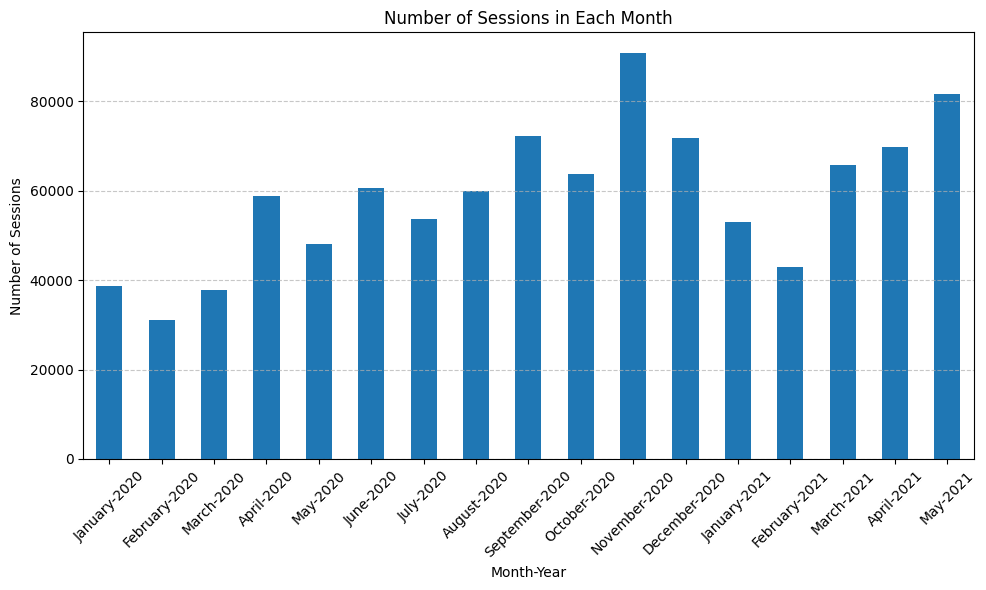

In [ ]:
min_date_per_session = train_sessions_items.copy()

# Convert 'date' column to datetime format
min_date_per_session['date'] = pd.to_datetime(min_date_per_session['date'])

# Get the minimum value of 'date' for each 'session_id'
min_date_per_session = min_date_per_session.groupby('session_id')['date'].min()

# Extract month and year from the minimum date for each session
min_date_per_session = min_date_per_session.dt.to_period('M')

# Count the number of sessions in each month
sessions_per_month_year = min_date_per_session.groupby(min_date_per_session.dt.to_timestamp()).size()

# Plot histogram
plt.figure(figsize=(10, 6))
sessions_per_month_year.plot(kind='bar')
plt.title('Number of Sessions in Each Month')
plt.xlabel('Month-Year')
plt.ylabel('Number of Sessions')
plt.xticks(rotation=45)

# Format x-axis labels to display only month
month_year_labels = [label.strftime('%B-%Y') for label in sessions_per_month_year.index]
plt.gca().set_xticklabels(month_year_labels)

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


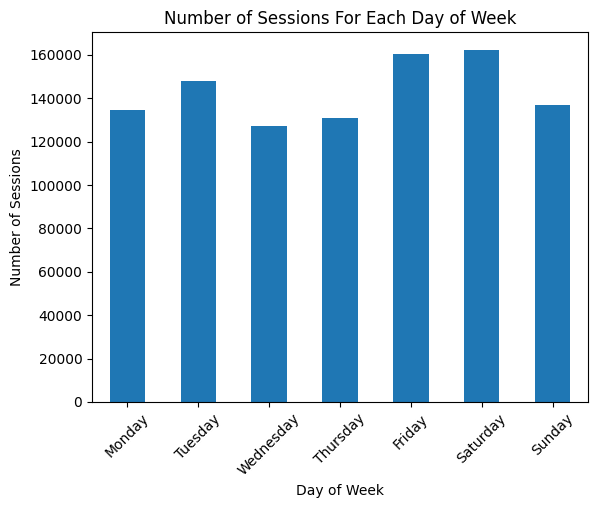

In [ ]:
min_date_per_session = train_sessions_items.copy()

# Convert 'date' column to datetime format
min_date_per_session['date'] = pd.to_datetime(min_date_per_session['date'])

# Get the minimum value of 'date' for each 'session_id'
min_date_per_session = min_date_per_session.groupby('session_id')['date'].min()

# Convert the Series to datetime format
dates_series = pd.to_datetime(min_date_per_session)

# Get the day of the week for each date
day_of_week = dates_series.dt.dayofweek

# Group by the values and count the occurrences
grouped_series = day_of_week.groupby(day_of_week).size()

# Plot histogram
grouped_series.plot(kind='bar')

# Adding labels and title
plt.title('Number of Sessions For Each Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Number of Sessions')

# Set x-axis ticks to represent the day of the week
days_of_week = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
plt.xticks(range(len(days_of_week)), days_of_week, rotation=45)

# Show plot
plt.show()

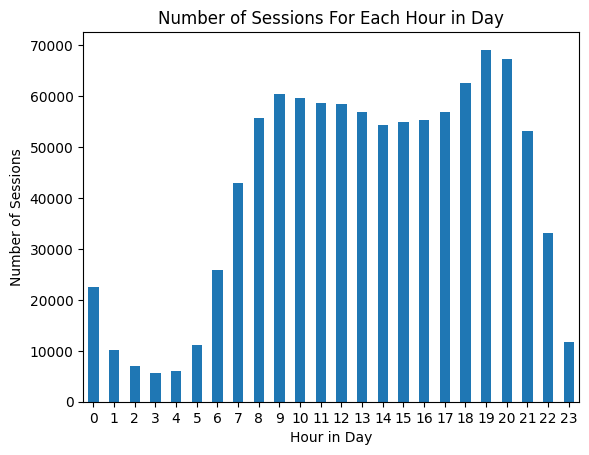

In [ ]:
min_date_per_session = train_sessions_items.copy()

# Convert 'date' column to datetime format
min_date_per_session['date'] = pd.to_datetime(min_date_per_session['date'])

# Get the minimum value of 'date' for each 'session_id'
min_date_per_session = min_date_per_session.groupby('session_id')['date'].min()

# Convert the Series to datetime format
dates_series = pd.to_datetime(min_date_per_session)

# Get the day of the week for each date
hour_of_session = dates_series.dt.hour

# Group by the values and count the occurrences
grouped_series = hour_of_session.groupby(hour_of_session).size()

# Plot histogram
grouped_series.plot(kind='bar')

# Adding labels and title
plt.title('Number of Sessions For Each Hour in Day')
plt.xlabel('Hour in Day')
plt.ylabel('Number of Sessions')

plt.xticks(rotation=0)

# Show plot
plt.show()

<Figure size 1000x600 with 0 Axes>

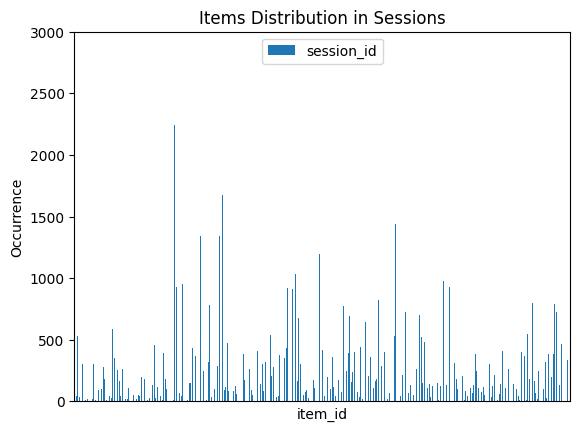

In [ ]:
item_distribution = train_sessions_items.copy()

# Get the minimum value of 'date' for each 'session_id'
item_distribution = item_distribution.groupby('item_id').count()
item_distribution.drop(columns=['date'], inplace=True)

plt.figure(figsize=(10, 6))
item_distribution.plot(kind='bar')

# Remove x-axis labels
plt.gca().set_xticks([])
plt.ylim(top=3000)

# Adding labels and title
plt.title('Items Distribution in Sessions')
plt.ylabel('Occurrence')

# Show plot
plt.show()

In [ ]:
item_occurrence_count = np.array(item_distribution.values)

# Calculate the median
median_value = np.median(item_occurrence_count)

# Calculate the mean (average)
mean_value = np.mean(item_occurrence_count)

# Calculate the standard deviation
std_deviation = np.std(item_occurrence_count)

# Calculate the variance
variance = np.var(item_occurrence_count)

# Calculate the minimum and maximum values
min_value = np.min(item_occurrence_count)
max_value = np.max(item_occurrence_count)

# Display the calculated statistics
print("Session's items statistics\n")
print("Number of items in all sessions:", item_distribution.shape[0])
print("Median of item occurrences:", median_value)
print("Mean of item occurrences:", mean_value)
print("Standard Deviation of item occurrences:", std_deviation)
print("Variance of item occurrences:", variance)
print("Minimum item occurrences:", min_value)
print("Maximum item occurrences:", max_value)

Session's items statistics

Number of items in all sessions: 23496
Median of item occurrences: 95.0
Mean of item occurrences: 201.89904664623765
Standard Deviation of item occurrences: 362.4341016815886
Variance of item occurrences: 131358.47806174008
Minimum item occurrences: 1
Maximum item occurrences: 14714


# Purchase Statistics

In [ ]:
purchase_items=pd.read_csv(os.path.join(original_data, "train_purchases.csv"))

In [ ]:
purchase_items_distribution = purchase_items['item_id'].value_counts().sort_index()

In [ ]:
item_ids, counts = np.unique(np.array(purchase_items['item_id'].values), return_counts=True)

# Calculate the median
median_value = np.median(counts)

# Calculate the mean (average)
mean_value = np.mean(counts)

# Calculate the standard deviation
std_deviation = np.std(counts)

# Calculate the variance
variance = np.var(counts)

# Calculate the minimum and maximum values
min_value = np.min(counts)
max_value = np.max(counts)

# Display the calculated statistics
print("Items statistics\n")
print("Number of items:", item_distribution.shape[0])
print("Median of item occurrences:", median_value)
print("Mean of item occurrences:", mean_value)
print("Standard Deviation of item occurrences:", std_deviation)
print("Variance of item occurrences:", variance)
print("Minimum item occurrences:", min_value)
print("Maximum item occurrences:", max_value)

Items statistics

Number of items: 23496
Median of item occurrences: 26.0
Mean of item occurrences: 52.89046384936796
Standard Deviation of item occurrences: 126.71280429723306
Variance of item occurrences: 16056.134772868885
Minimum item occurrences: 1
Maximum item occurrences: 8451


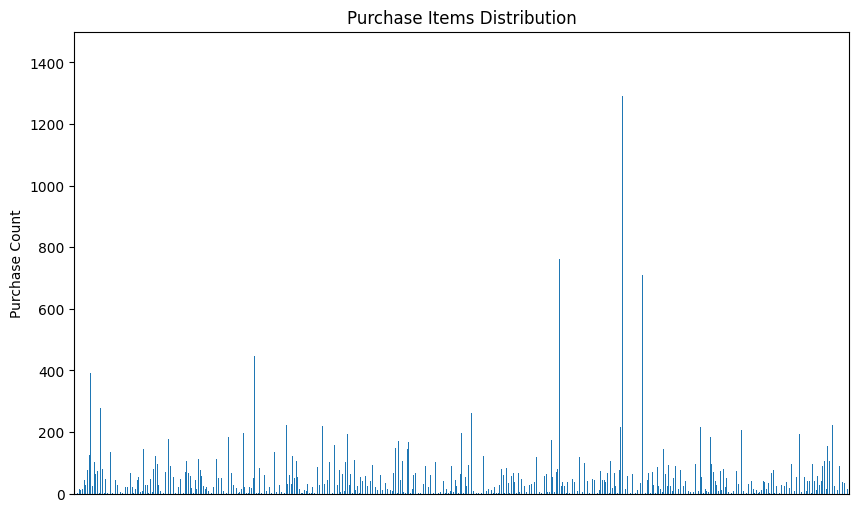

In [ ]:
plt.figure(figsize=(10, 6))
purchase_items_distribution.plot(kind='bar')

# Remove x-axis labels
plt.gca().set_xticks([])
plt.ylim(top=1500)

# Adding labels and title
plt.title('Purchase Items Distribution')
plt.ylabel('Purchase Count')

# Show plot
plt.show()

# Items feature's Statistics

In [ ]:
item_features=pd.read_csv(os.path.join(original_data,"item_features.csv"))
items_features_count = item_features.drop(columns=['feature_value_id', 'feature_category_id']).value_counts().values
diffent_feature_count = len(item_features['feature_category_id'].unique())

In [ ]:
def calc_most_popular_categories(counts_dict, popular=True):
  return sorted(counts_dict.items(), key=lambda item: item[1], reverse=popular)[:10]

In [ ]:
# Create a dictionary to store the feature categories and their counts
item_counts = {}
feature_categories_counts = {}
feature_values_counts = {}

# Iterate through each row in the dataframe
for index, row in item_features.iterrows():
    item_id = row["item_id"]
    feature_category = row["feature_category_id"]
    feature_value = row["feature_value_id"]

    if item_id not in item_counts:
      item_counts[item_id] = 1
    else:
      item_counts[item_id] += 1

    if feature_category not in feature_categories_counts:
      feature_categories_counts[feature_category] = 1
    else:
      feature_categories_counts[feature_category] += 1

    if feature_value not in feature_values_counts:
      feature_values_counts[feature_value] = 1
    else:
      feature_values_counts[feature_value] += 1


print(f'The amount of distinct items: {len(item_counts)}')

print(f'The amount of distinct item categories: {len(feature_categories_counts)}')
most_popular_categories = calc_most_popular_categories(feature_categories_counts)
least_popular_categories = calc_most_popular_categories(feature_categories_counts, popular=False)
print(f'The amount of distinct category values: {len(feature_values_counts)}')
print(f'The mean of the amount of features per item:{item_features.groupby("item_id")["feature_category_id"].count().mean()}')

The amount of distinct items: 23691
The amount of distinct item categories: 73
The amount of distinct category values: 890
The mean of the amount of features per item:19.912667257608373


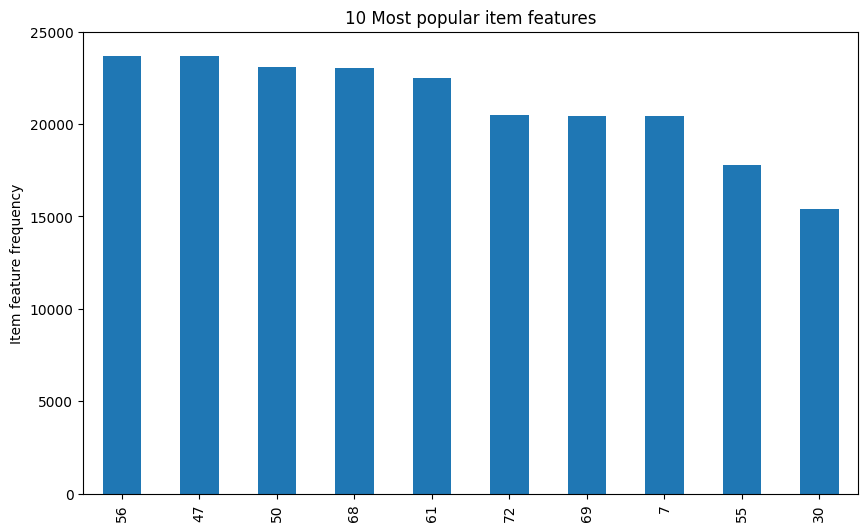

In [ ]:
most_popular_categories_df = pd.DataFrame(most_popular_categories, columns=['Item feature','Amount'])

plt.figure(figsize=(10, 6))
ax = most_popular_categories_df['Amount'].plot(kind='bar')


plt.ylim(top=25000)
plt.xticks(range(len(most_popular_categories_df['Amount'])), most_popular_categories_df['Item feature'])

# Adding labels and title
ax.set_title("10 Most popular item features")
plt.ylabel('Item feature frequency')

# Show plot
plt.show()

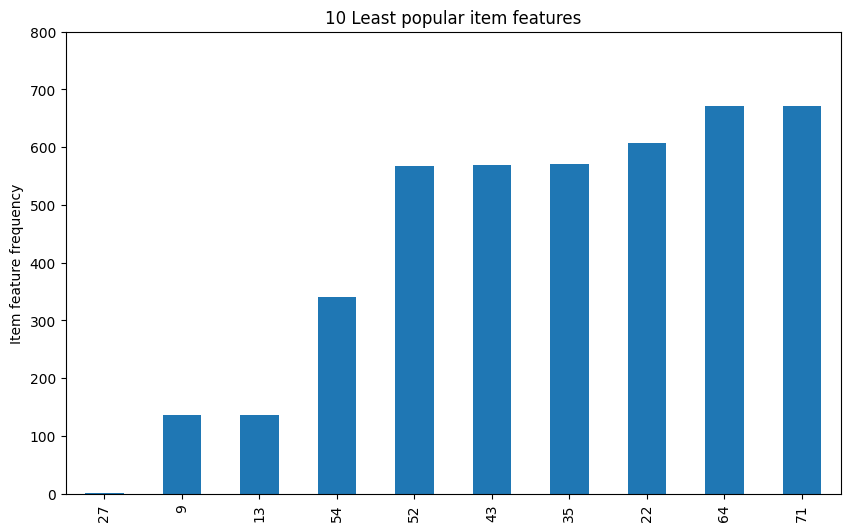

In [ ]:
least_popular_categories_df = pd.DataFrame(least_popular_categories, columns=['Item feature','Amount'])

plt.figure(figsize=(10, 6))
ax = least_popular_categories_df['Amount'].plot(kind='bar')


plt.ylim(top=800)
plt.xticks(range(len(least_popular_categories_df['Amount'])), least_popular_categories_df['Item feature'])

# Adding labels and title
ax.set_title("10 Least popular item features")
plt.ylabel('Item feature frequency')

# Show plot
plt.show()

In [ ]:
# Calculate the median
median_value = np.median(items_features_count)

# Calculate the mean (average)
mean_value = np.mean(items_features_count)

# Calculate the standard deviation
std_deviation = np.std(items_features_count)

# Calculate the variance
variance = np.var(items_features_count)

# Calculate the minimum and maximum values
min_value = np.min(items_features_count)
max_value = np.max(items_features_count)

# Display the calculated statistics
print("Items's features statistics\n")
print("Number of difference features:", diffent_feature_count)
print("Median of item features:", median_value)
print("Mean of item features:", mean_value)
print("Standard Deviation of item features:", std_deviation)
print("Variance of item features:", variance)
print("Minimum item features:", min_value)
print("Maximum item features:", max_value)

Items's features statistics

Number of difference features: 73
Median of item features: 20.0
Mean of item features: 19.912667257608373
Standard Deviation of item features: 5.1308335643156235
Variance of item features: 26.325453064707762
Minimum item features: 2
Maximum item features: 33


In [ ]:
session_cross_items_features = pd.merge(train_sessions_items.drop(columns=['date']), item_features, on='item_id', how='left')

In [ ]:
enriched_sessions = session_cross_items_features.groupby('session_id')

In [ ]:
number_of_common_features_in_session_array = []
for group_name, group_data in enriched_sessions:
    number_of_common_features_in_session_array.append(group_data.drop_duplicates().drop(columns='item_id').duplicated().sum())

In [ ]:
# Calculate the median
median_value = np.median(number_of_common_features_in_session_array)

# Calculate the mean (average)
mean_value = np.mean(number_of_common_features_in_session_array)

# Calculate the standard deviation
std_deviation = np.std(number_of_common_features_in_session_array)

# Calculate the variance
variance = np.var(number_of_common_features_in_session_array)

# Calculate the minimum and maximum values
min_value = np.min(number_of_common_features_in_session_array)

# Display the calculated statistics
print("Items's features statistics\n")
print("Number of difference features:", diffent_feature_count)
print("Median of common features in seriers (same feature_id and feature_value):", median_value)
print("Mean of common features in seriers (same feature_id and feature_value):", mean_value)
print("Standard Deviation common features in seriers (same feature_id and feature_value):", std_deviation)
print("Variance of common features in seriers (same feature_id and feature_value):", variance)
print("Minimum common features in seriers (same feature_id and feature_value):", min_value)

Items's features statistics

Number of difference features: 73
Median of common features in seriers (same feature_id and feature_value): 16.0
Mean of common features in seriers (same feature_id and feature_value): 48.51407
Standard Deviation common features in seriers (same feature_id and feature_value): 89.76895023355847
Variance of common features in seriers (same feature_id and feature_value): 8058.464426035097
Minimum common features in seriers (same feature_id and feature_value): 0
